In [ ]:
# Small linear regression model,, to predict the life satisfaction based on the single attribute GDP per capita

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [139]:
#reading the csv data received from https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=table

df = pd.read_csv('gdp-per-capita-maddison.csv')
df.tail(10)

,Entity,Code,Year,GDP per capita,900793-annotations
21576,Zimbabwe,ZWE,2013,1766.3789,NaN
21577,Zimbabwe,ZWE,2014,1789.0048,NaN
21578,Zimbabwe,ZWE,2015,1798.7872,NaN
21579,Zimbabwe,ZWE,2016,1782.8301,NaN
21580,Zimbabwe,ZWE,2017,1843.9463,NaN
21581,Zimbabwe,ZWE,2018,1900.1992,NaN
21582,Zimbabwe,ZWE,2019,1753.0244,NaN
21583,Zimbabwe,ZWE,2020,1585.9728,NaN
21584,Zimbabwe,ZWE,2021,1687.2532,NaN
21585,Zimbabwe,ZWE,2022,1703.5294,NaN


In [140]:
# we just looking for the recent year data that was collected and then dropping the 3 columns

df1 = df[df['Year']== 2022]
df1 = df1.drop(['900793-annotations','Code','Year'],axis=1)

In [141]:
# we are just looking for the specific country data so extracting those

df1.head(10)

countries_for_analysis = ['Turkey','Hungary','France','United States','New Zealand','Australia','Denmark'] 

df1.rename(columns={'Entity':'Country'},inplace = True)
filtered_df1 = df1[df1['Country'].isin(countries_for_analysis)]
filtered_df1

,Country,GDP per capita
700,Australia,52049.430
4186,Denmark,50689.680
6023,France,39065.710
7661,Hungary,29451.855
12341,New Zealand,38250.120
19235,Turkey,27361.988
20649,United States,58487.465


In [142]:
# removing the index and make the countries as the index

filtered_df1.reset_index(drop=True,inplace=True)

filtered_df1.set_index('Country', inplace=True)

In [143]:
filtered_df1

,GDP per capita
Country,
Australia,52049.430
Denmark,50689.680
France,39065.710
Hungary,29451.855
New Zealand,38250.120
Turkey,27361.988
United States,58487.465


In [144]:
#fetching another set of data from https://www.oecdbetterlifeindex.org and renaming the column name

df2 = pd.read_excel('DataForFigure2.1+with+sub+bars+2024.xls')
df2.rename(columns={'Country name':'Country'},inplace = True)

In [145]:
# fetching the specific countrie as features for test data

countries_for_analysis = ['Turkey','Hungary','France','United States','New Zealand','Australia','Denmark'] 

filtered_df2 = df2[df2['Country'].isin(countries_for_analysis)]
filtered_df2

,Country,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
9,Australia,7.0569,7.140660,6.973140,1.854258,1.461091,0.692018,0.756271,0.225208,0.323352,1.744744
10,New Zealand,7.0292,7.104537,6.953863,1.810349,1.526940,0.672621,0.745547,0.226082,0.480217,1.567451
22,United States,6.7248,6.818423,6.631177,1.938863,1.391735,0.542401,0.586354,0.223286,0.169151,1.873055
26,France,6.6090,6.685018,6.532982,1.818343,1.348102,0.727347,0.649820,0.112280,0.280878,1.672188
55,Hungary,6.0169,6.123945,5.909855,1.722071,1.528214,0.595742,0.580927,0.122653,0.067108,1.400156


In [146]:
# removing the index and make the country as the index

filtered_df2.reset_index(drop = True, inplace = True)
filtered_df2.set_index('Country',inplace= True)

In [147]:

filtered_df2.rename(columns = {'Ladder score':'Life satisfaction'},inplace = True)

/var/folders/nb/094jxb115nj0gjxwpmy6b2cc0000gn/T/ipykernel_84112/853231695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2.rename(columns = {'Ladder score':'Life satisfaction'},inplace = True)


In [148]:


updated_dataframe = filtered_df2[['Life satisfaction']]
updated_dataframe

,Life satisfaction
Country,
Denmark,7.5827
Australia,7.0569
New Zealand,7.0292
United States,6.7248
France,6.6090
Hungary,6.0169


In [149]:
#merging the dataframes using join, how = inner will consider all the index which is common in both

In [168]:
final_df = filtered_df1.join(updated_dataframe,how = 'inner')
final_df 


,GDP per capita,Life satisfaction
Country,,
Australia,52049.430,7.0569
Denmark,50689.680,7.5827
France,39065.710,6.6090
Hungary,29451.855,6.0169
New Zealand,38250.120,7.0292
United States,58487.465,6.7248


In [151]:
#filling na value by checking online the life satisfaction in Turkey
final_df['Life satisfaction'] = final_df['Life satisfaction'].fillna(5.5)
final_df

,GDP per capita,Life satisfaction
Country,,
Australia,52049.430,7.0569
Denmark,50689.680,7.5827
France,39065.710,6.6090
Hungary,29451.855,6.0169
New Zealand,38250.120,7.0292
Turkey,27361.988,5.5000
United States,58487.465,6.7248


In [152]:
# converting the GDP from float to int

final_df['GDP per capita'] = final_df['GDP per capita'].astype(int)
final_df

,GDP per capita,Life satisfaction
Country,,
Australia,52049,7.0569
Denmark,50689,7.5827
France,39065,6.6090
Hungary,29451,6.0169
New Zealand,38250,7.0292
Turkey,27361,5.5000
United States,58487,6.7248


In [153]:
# fetching the one value after point

final_df['Life satisfaction'] = final_df['Life satisfaction'].round(1)
final_df.sort_values('GDP per capita')

,GDP per capita,Life satisfaction
Country,,
Turkey,27361,5.5
Hungary,29451,6.0
New Zealand,38250,7.0
France,39065,6.6
Denmark,50689,7.6
Australia,52049,7.1
United States,58487,6.7


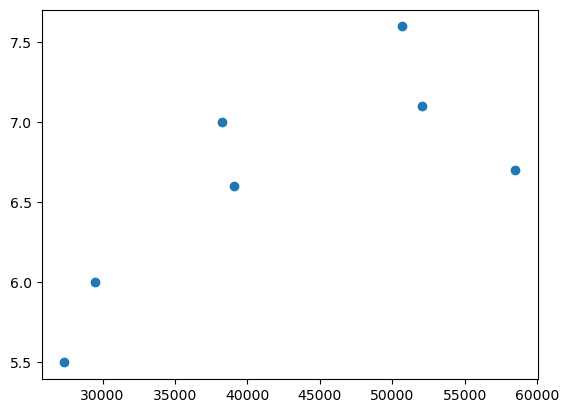

In [154]:
#plotting the scatter plot on the actual data

In [155]:
# setting up the model and train the model
model = LinearRegression()

X = final_df[['GDP per capita']]
y = final_df[['Life satisfaction']]
model.fit(X,y)

LinearRegression()

In [157]:
# predicted values
y_pred = model.predict(X) 

array([[7.08080525],
       [7.02037322],
       [6.50385713],
       [6.07665602],
       [6.46764235],
       [5.98378621],
       [7.36687981]])

In [159]:
# mean squared error (actual value and predicted value), if MSE is low then our predication is good like here it is 0.18 which means our 
# prediction is similar to the actual data
mse = mean_squared_error(y, y_pred)
mse

0.18766252509428635

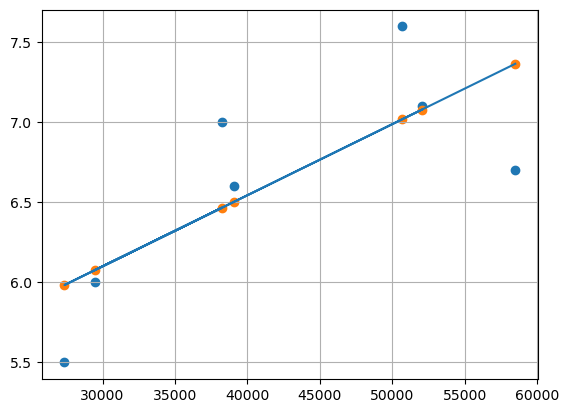

In [165]:
# plotting the points for both actual and predicted data and drawing the best fit line

plt.scatter(X,y)
plt.scatter(X,y_pred)
plt.grid() 
plt.plot(X,y_pred)

In [167]:
#predicting one new value based on the model which we have created above. 

X_new = [[30000]]
model.predict(X_new)

/Users/kumarkatariya/Desktop/Data_Science/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.10105101]])